Course: Laboratory Practice III 

Course Code: 410246 

Name: Rushikesh Arun Gaikwad

Class: BE 

Roll No.: 26    
                             
Div: BE-A 

Title: Predict the price of the Uber ride from a given pickup point to
the agreed drop-off location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression
models.
5. Evaluate the models and compare their respective
scores like R2, RMSE, etc. Dataset link:
https://www.kaggle.com/datasets/yasserh/uber-fares-
dataset
 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/uber.csv")

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
#df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [ ]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
df.drop("Unnamed: 0",axis='columns',inplace=True)

In [ ]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


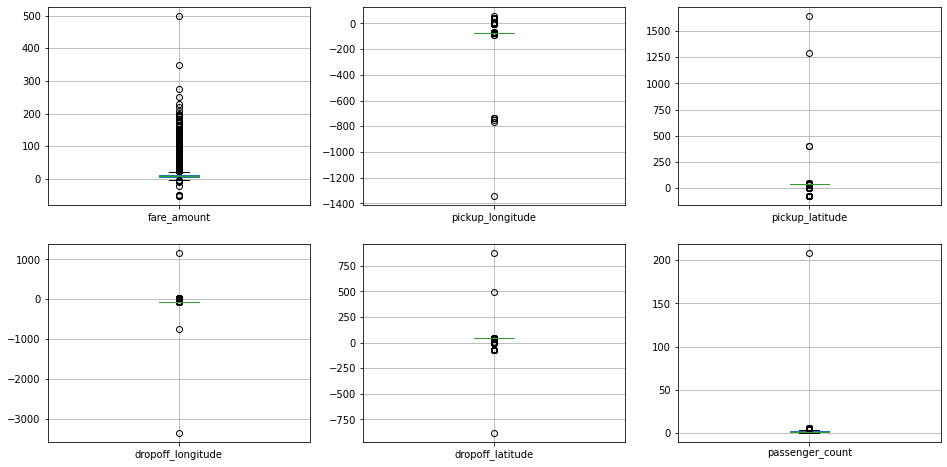

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
df.boxplot(column="fare_amount",ax=axes[0,0])
df.boxplot(column="pickup_longitude",ax=axes[0,1])
df.boxplot(column="pickup_latitude",ax=axes[0,2])
df.boxplot(column="dropoff_longitude",ax=axes[1,0])
df.boxplot(column="dropoff_latitude",ax=axes[1,1])
df.boxplot(column="passenger_count",ax=axes[1,2])

In [ ]:
q1=df['fare_amount'].quantile(0.25)
q3=df['fare_amount'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*(IQR)
UL=q3+1.5*(IQR)
print(UL,LL)

22.25 -3.75


In [ ]:
outlier =[]
for x in df['fare_amount']:
    if ((x> UL) or (x<LL)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [24.5, 25.7, 39.5, 29.0, 56.8, 26.1, 49.57, 30.9, 26.9, 43.0, 35.3, 38.54, 29.0, 24.0, 23.0, 45.0, 29.5, 23.7, 24.0, 49.8, 24.0, 23.0, 34.25, 39.33, 45.0, 35.7, 29.3, 49.8, 43.0, 57.33, 37.5, 37.47, 49.57, 29.7, 33.7, 23.7, 25.7, 36.0, 25.7, 57.33, 49.8, 22.5, 38.83, 57.33, 45.0, 22.5, 26.33, 39.5, 26.1, 25.3, 49.8, 31.8, 26.1, 49.57, 33.3, 49.8, 25.07, 40.5, 43.0, 52.0, 27.0, 52.0, 30.83, 35.33, 93.16, 27.0, 40.33, 24.5, 32.9, 34.0, 26.0, 23.0, 23.0, 31.83, 22.5, 29.8, 69.25, 26.1, 57.33, 25.0, 51.5, 35.3, 39.33, 23.0, 57.33, 41.5, 52.0, 45.0, 42.8, 40.3, 23.5, 23.0, 28.5, 25.7, 25.3, 36.8, 36.8, 33.5, 41.83, 43.7, 22.5, 27.6, 29.7, 46.1, 23.5, 33.33, 31.07, 28.9, 45.33, 24.5, 37.5, 33.3, 49.83, 29.47, 52.0, 22.5, 40.54, 52.0, 45.33, 25.0, 32.83, 45.0, 57.33, 50.0, 29.0, 26.1, 45.0, 57.54, 24.0, 41.33, 22.5, 27.5, 31.33, 25.3, 23.5, 45.0, 27.5, 56.0, 27.0, 45.0, 45.0, 33.47, 52.0, 23.5, 27.5, 49.8, 49.8, 34.5, 45.0, 34.5, 34.83, 49.57, 24.0, 26.33, 27.0, 73.

In [ ]:
df['fare_amount']=np.where(df['fare_amount'] <=LL, LL,df['fare_amount'])
df['fare_amount']=np.where(df['fare_amount'] >=UL, UL,df['fare_amount'])

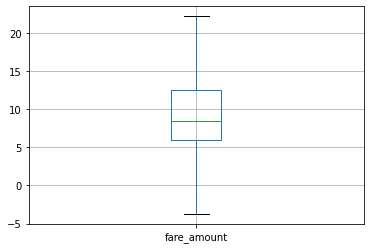

In [ ]:
df.boxplot(column='fare_amount')

In [ ]:
q1=df['pickup_longitude'].quantile(0.25)
q3=df['pickup_longitude'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*(IQR)
UL=q3+1.5*(IQR)
print(UL,LL)

-73.92978625000003 -74.02943224999999


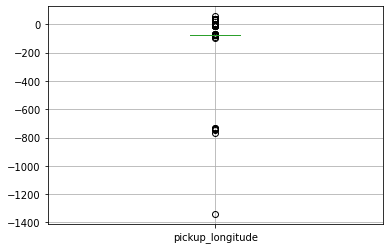

In [ ]:
df.boxplot(column='pickup_longitude')

In [ ]:
df['pickup_longitude']=np.where(df['pickup_longitude'] <=LL, LL,df['pickup_longitude'])
df['pickup_longitude']=np.where(df['pickup_longitude'] >=UL, UL,df['pickup_longitude'])

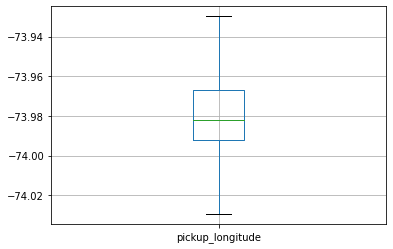

In [ ]:
df.boxplot(column='pickup_longitude')

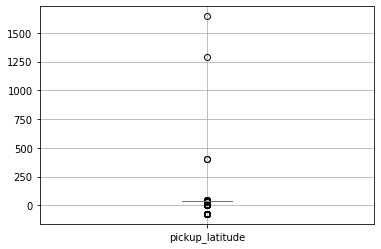

In [ ]:
df.boxplot(column='pickup_latitude')

In [ ]:
q1=df['pickup_latitude'].quantile(0.25)
q3=df['pickup_latitude'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*(IQR)
UL=q3+1.5*(IQR)
print(UL,LL)

40.815701375 40.68625237500001


In [ ]:
df['pickup_latitude']=np.where(df['pickup_latitude'] <=LL, LL,df['pickup_latitude'])
df['pickup_latitude']=np.where(df['pickup_latitude'] >=UL, UL,df['pickup_latitude'])

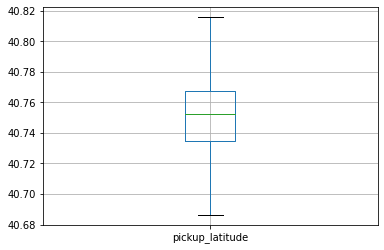

In [ ]:
df.boxplot(column='pickup_latitude')

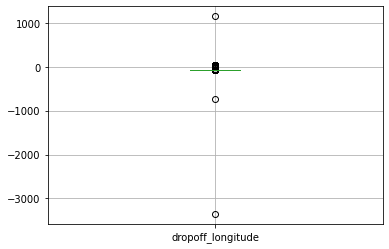

In [ ]:
df.boxplot('dropoff_longitude')

In [ ]:
q1=df['dropoff_longitude'].quantile(0.25)
q3=df['dropoff_longitude'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*(IQR)
UL=q3+1.5*(IQR)
print(UL,LL)

-73.9220345 -74.0330305


In [ ]:
df['dropoff_longitude']=np.where(df['dropoff_longitude'] <=LL, LL,df['dropoff_longitude'])
df['dropoff_longitude']=np.where(df['dropoff_longitude'] >=UL, UL,df['dropoff_longitude'])

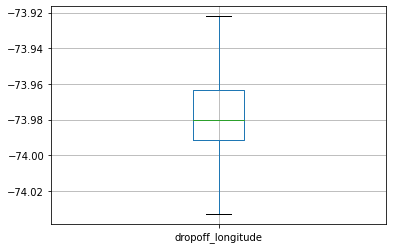

In [ ]:
df.boxplot('dropoff_longitude')

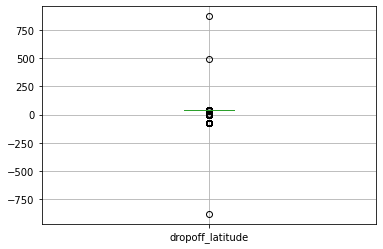

In [ ]:
df.boxplot('dropoff_latitude')

In [ ]:
q1=df['dropoff_latitude'].quantile(0.25)
q3=df['dropoff_latitude'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*(IQR)
UL=q3+1.5*(IQR)
print(UL,LL)

40.819268347747794 40.68255579135132


In [ ]:
df['dropoff_latitude']=np.where(df['dropoff_latitude'] <=LL, LL,df['dropoff_latitude'])
df['dropoff_latitude']=np.where(df['dropoff_latitude'] >=UL, UL,df['dropoff_latitude'])

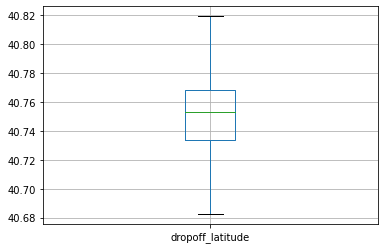

In [ ]:
df.boxplot('dropoff_latitude')

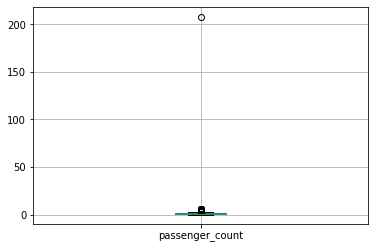

In [ ]:
df.boxplot(column='passenger_count')

In [ ]:
q1=df['passenger_count'].quantile(0.25)
q3=df['passenger_count'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*(IQR)
UL=q3+1.5*(IQR)
print(UL,LL)

3.5 -0.5


In [ ]:
df['passenger_count']=np.where(df['passenger_count'] <=LL, LL,df['passenger_count'])
df['passenger_count']=np.where(df['passenger_count'] >=UL, UL,df['passenger_count'])

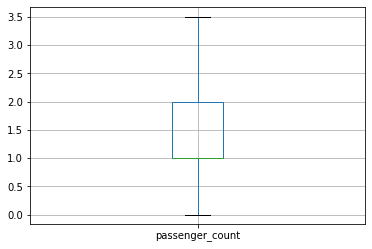

In [ ]:
df.boxplot(column='passenger_count')

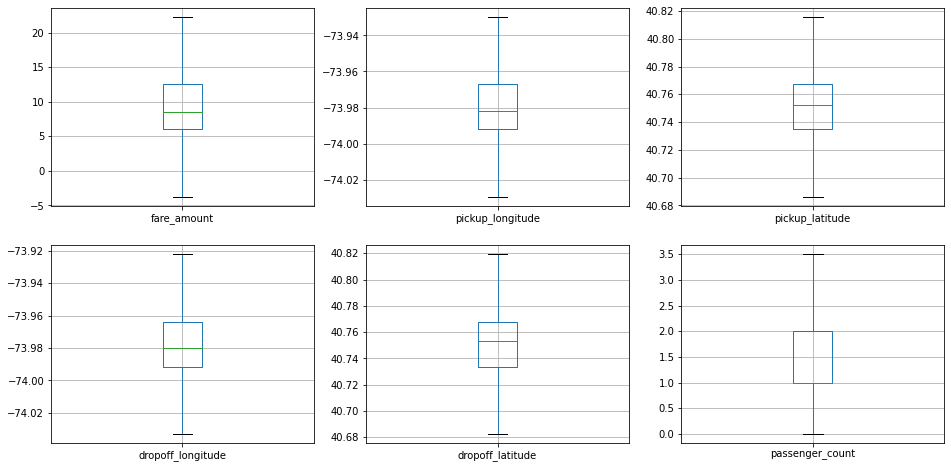

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
df.boxplot(column="fare_amount",ax=axes[0,0])
df.boxplot(column="pickup_longitude",ax=axes[0,1])
df.boxplot(column="pickup_latitude",ax=axes[0,2])
df.boxplot(column="dropoff_longitude",ax=axes[1,0])
df.boxplot(column="dropoff_latitude",ax=axes[1,1])
df.boxplot(column="passenger_count",ax=axes[1,2])

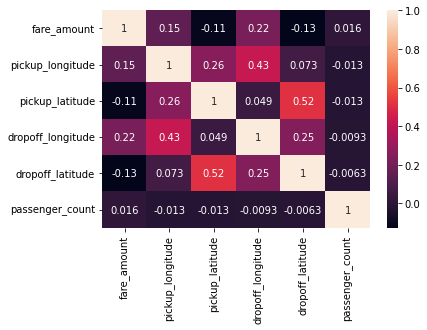

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
x= df.iloc [:, : -1]
y= df.iloc [:, -1 :] 

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(df.drop(labels=['fare_amount','pickup_datetime','key'], axis=1), df['fare_amount'], test_size = 0.25, random_state = 0)

print("xtrain shape : ", xtrain.shape)
print("xtest shape : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape : ", ytest.shape)

xtrain shape :  (150000, 5)
xtest shape :  (50000, 5)
ytrain shape :  (150000,)
ytest shape :  (50000,)


In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(xtrain,ytrain)


LinearRegression()

In [ ]:
ytest_pred=lm.predict(xtest)
ytrain_pred=lm.predict(xtrain)

In [ ]:
import matplotlib.pyplot as plt

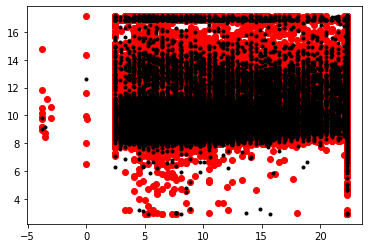

In [ ]:
plt.scatter(ytrain,ytrain_pred,c='red',marker='o',label="Training data")
plt.scatter(ytest,ytest_pred,c="black",marker=".",label="Testing data")

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(ytest,ytest_pred)
print("mseTest = ", mse)
print("rmseTest = ", np.sqrt(mse))
mse = mean_squared_error(ytrain,ytrain_pred)
print("mseTrain = ", mse)
print("rmseTrain = ", np.sqrt(mse))

mseTest =  27.04690874482973
rmseTest =  5.200664259960426
mseTrain =  26.936549296136462
rmseTrain =  5.19004328461107


In [ ]:
corr_matrix = df.corr()

In [ ]:
print(corr_matrix["fare_amount"].sort_values(ascending=False))

fare_amount          1.000000
dropoff_longitude    0.218704
pickup_longitude     0.154069
passenger_count      0.015778
pickup_latitude     -0.110842
dropoff_latitude    -0.125898
Name: fare_amount, dtype: float64


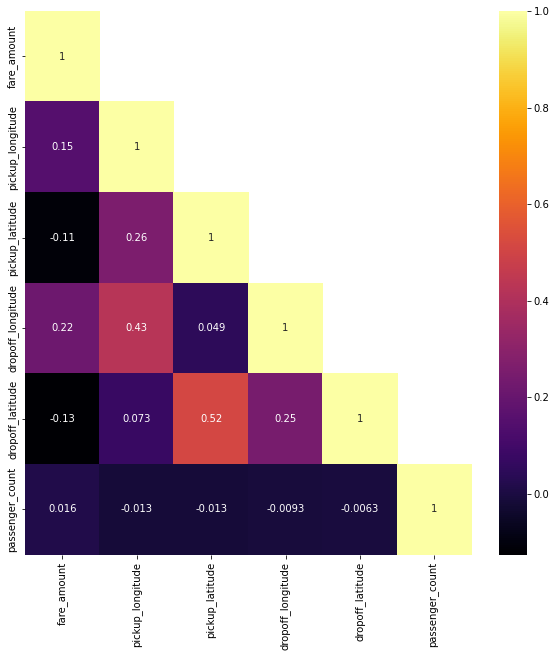

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='inferno', mask=np.triu(df.corr(), k=1))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [ ]:
ytest_pred2=rf.predict(xtest)
ytrain_pred2=rf.predict(xtrain)

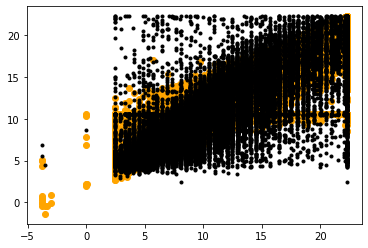

In [ ]:
plt.scatter(ytrain,ytrain_pred2,c='orange',marker='o',label="Training data")
plt.scatter(ytest,ytest_pred2,c="black",marker=".",label="Testing data")

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
mse = mean_squared_error(ytest,ytest_pred2)
print("mseTest = ", mse)
print("rmseTest = ", np.sqrt(mse))

mse = mean_squared_error(ytrain,ytrain_pred2)
print("mseTrain = ", mse)
print("rmseTrain = ", np.sqrt(mse))

mseTest =  7.109194055504839
rmseTest =  2.6663071945116976
mseTrain =  1.6670899194229358
rmseTrain =  1.291158363417492
